<a href="https://colab.research.google.com/github/vaisiria/ml/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Binary Classification Results (0 vs Not 0):
Accuracy: 0.9917

Confusion Matrix:
 [[ 943   37]
 [  46 8974]]

Classification Report:
               precision    recall  f1-score   support

     Digit 0       0.95      0.96      0.96       980
       Not 0       1.00      0.99      1.00      9020

    accuracy                           0.99     10000
   macro avg       0.97      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



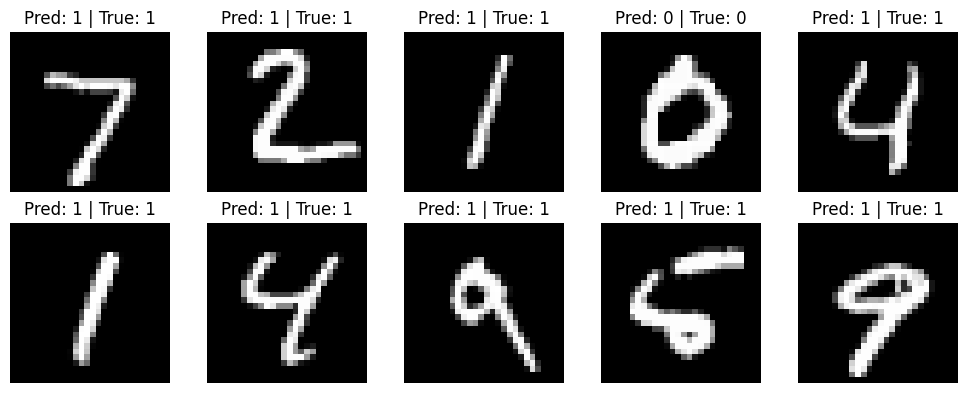

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression

# Step 1: Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)


y_train_binary = np.where(y_train == 0, 0, 1)
y_test_binary = np.where(y_test == 0, 0, 1)


X_train = X_train / 255.0
X_test = X_test / 255.0


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_binary)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test_binary, y_pred)
conf_matrix = confusion_matrix(y_test_binary, y_pred)
report = classification_report(y_test_binary, y_pred, target_names=["Digit 0", "Not 0"])


print("✅ Binary Classification Results (0 vs Not 0):")
print("Accuracy:", round(accuracy, 4))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]} | True: {y_test_binary[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
